<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/Gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM)
1. **Probabilistic Models:** GMMs are probabilistic models, which means they provide a probability for each data point's membership in each cluster, unlike k-means, which provides a definitive clustering.

2. **Soft Clustering:** GMM uses a soft clustering approach. In soft clustering, instead of assigning each data point to a single cluster, it gives a probability (or weight) of that data point belonging to each of the clusters.

3. **Assumption of Gaussian Distributions**: GMMs assume the data is generated from a mixture of several Gaussian distributions. Each Gaussian distribution represents a cluster.

4. **Grouping Data Points:** Data points are grouped based on the likelihood of them belonging to a particular distribution.

5. **Expectation-Maximization (EM) Algorithm in GMM**
The EM algorithm in GMM involves two main steps iterated until convergence:

**E-Step (Expectation):**
Calculate the probabilities (weights) of each data point belonging to each cluster.
These probabilities are based on the current parameters of the Gaussian distributions (means, variances, and mixture coefficients).

**M-Step (Maximization):**
Update the parameters (means, variances, and mixture coefficients) of the Gaussian distributions.
This is done to maximize the likelihood of the data given these parameters.
Characteristics of the EM Algorithm in GMM

*Smooth Gaussian Models:* Each cluster is associated with a smooth Gaussian model, not a hard boundary.

*Handling of Global Optima:* Similar to k-means, the EM algorithm in GMM can sometimes converge to a local, rather than global, optimum. Therefore, multiple initializations are often used.

*E-step and M-step:* The E-step updates expectations of cluster memberships, while the M-step maximizes the fitness function to define cluster centers.

**Application of GMM**
In practice, GMMs are useful for data that exhibit a mixture of underlying distributions and where the soft clustering approach (providing membership probabilities) is more appropriate than hard clustering. They are widely used in various domains, including image processing, speech recognition, and bioinformatics.

By understanding these aspects, one can effectively apply GMM to cluster data, interpret the results meaningfully, and make informed decisions based on the probabilistic nature of the model.

**Step 1 Completed: Load and Prepare the Data**
The dataset has been loaded, and we're focusing on the numerical columns: Budget, Food Rating, Service Rating, and Overall Rating. These will be used for clustering.

**Step 2: Determine the Number of Components (Clusters)**

Next, we need to determine the optimal number of Gaussian components for the GMM. This can be done by evaluating the model's performance with different numbers of components using criteria like BIC (Bayesian Information Criterion) or AIC (Akaike Information Criterion). Lower BIC/AIC values generally indicate a better model fit.

Let's proceed with finding the optimal number of components.

In [3]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()


Saving Cuisine_rating.csv to Cuisine_rating.csv


In [4]:
import pandas as pd

# Load the data
file_path = 'Cuisine_rating.csv'
data = pd.read_csv(file_path)


# Display the first few rows of the dataframe
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No



**BIC and AIC Interpretation:** Both BIC and AIC penalize complex models (i.e., models with more parameters). A lower score on either metric generally suggests a better model. The optimal number of clusters is where these scores are minimized or where the rate of decrease sharply changes, known as the "elbow point."
From the plot, we look for the point where the curve starts to flatten out. This point indicates the optimal balance between the model's complexity and its fit to the data.

**Step 3: Create and Fit the GMM**
Based on the BIC and AIC plots, let's choose the optimal number of components and fit the GMM to the data. For this example, we'll select the number of components at the elbow point of the BIC curve.

Let's proceed with creating and fitting the GMM

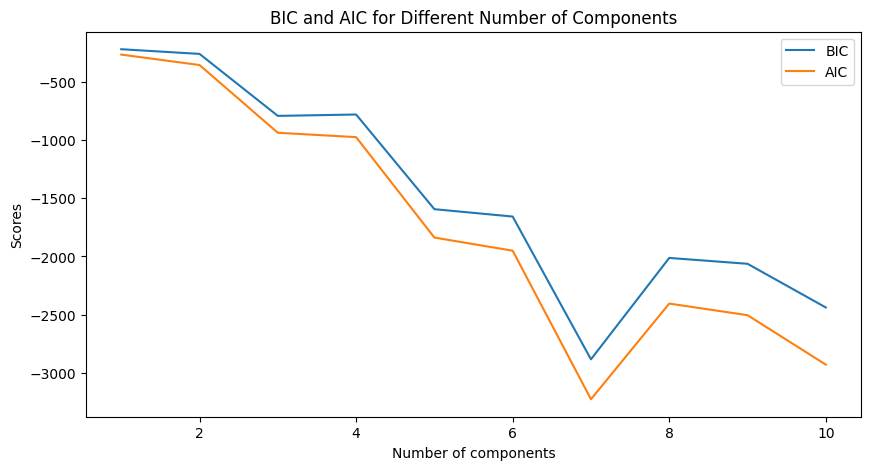

In [5]:
# Re-importing necessary libraries and reloading the data
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Reload the data
file_path = 'Cuisine_rating.csv'
data_gmm = pd.read_csv(file_path)

# Selecting only the numerical columns for clustering
numerical_columns = ['Budget', 'Food Rating', 'Service Rating', 'Overall Rating']
gmm_data = data_gmm[numerical_columns]

# Trying different numbers of components and calculating BIC and AIC for each
n_components_range = np.arange(1, 11)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(gmm_data)
    bic_scores.append(gmm.bic(gmm_data))
    aic_scores.append(gmm.aic(gmm_data))

# Plotting BIC and AIC scores
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Scores')
plt.title('BIC and AIC for Different Number of Components')
plt.show()



**Step 3 & 4 Completed**: Create and Fit the GMM, Assign Clusters to Data Points

**Create and Fit the GMM:** A Gaussian Mixture Model was created and fitted to the data with 7 components, which was identified as the optimal number based on the BIC curve.

**Assign Clusters to Data Points:** Each data point in the dataset has been assigned to one of the seven clusters. Here's a snapshot of your data with the GMM cluster assignments:

In [6]:
# Step 3: Create and Fit the GMM
# Selecting the number of components at the elbow point of the BIC curve
optimal_n_components = np.argmin(bic_scores) + 1  # Adding 1 because index starts at 0

# Creating the GMM with the chosen number of components
optimal_gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
optimal_gmm.fit(gmm_data)

# Step 4: Assign Clusters to Data Points
# Predicting the cluster for each data point
gmm_labels = optimal_gmm.predict(gmm_data)

# Adding GMM cluster labels to the original dataframe
clustered_data_gmm = data_gmm.copy()
clustered_data_gmm['GMM_Cluster'] = gmm_labels

# Displaying the first few rows of the dataframe with GMM cluster labels
clustered_data_gmm.head(), optimal_n_components


(   User ID  Area code            Location  Gender   YOB Marital Status  \
 0        1        153  Upper East Side,NY  Female  2006         Single   
 1        2        123       St. George,NY  Female  1991        Married   
 2        3        122  Upper West Side,NY    Male  1977         Single   
 3        4        153  Upper East Side,NY  Female  1956        Married   
 4        5        129     Central Park,NY    Male  1997         Single   
 
        Activity  Budget  Cuisines  Alcohol     Smoker  Food Rating  \
 0  Professional       3  Japanese     Never     Never            5   
 1       Student       3    Indian     Never  Socially            1   
 2       Student       5   Seafood     Often     Often            5   
 3  Professional       5  Japanese     Never  Socially            3   
 4       Student       4  Filipino  Socially     Never            2   
 
    Service Rating  Overall Rating Often A S  GMM_Cluster  
 0               4             4.5        No            2  


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

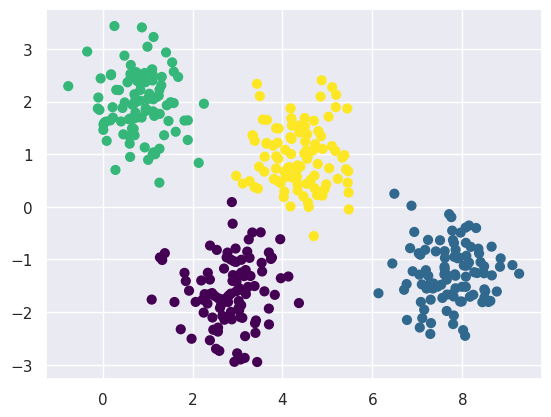

In [9]:
# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

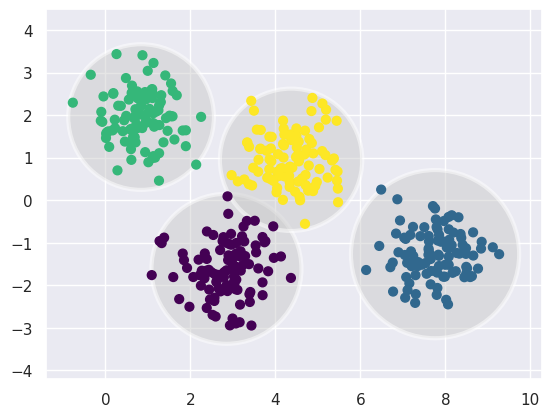

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

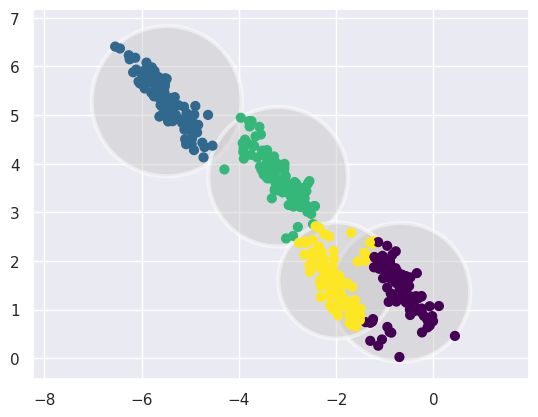

In [11]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [12]:
import numpy as np
from sklearn.datasets import make_blobs

# Example: Creating synthetic data for demonstration
X_train, _ = make_blobs(n_samples=300, centers=4, n_features=4, random_state=42)


In [13]:
from sklearn.mixture import GaussianMixture

# Initialize GaussianMixture with the number of components (clusters)
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model
gmm.fit(X_train)


GaussianMixture(n_components=4, random_state=42)

In [14]:
# Suppose X is your prediction data and has the same 4 features
# For demonstration, let's use a part of X_train
X = X_train[:10]


In [15]:
# Predict probabilities
probs = gmm.predict_proba(X)

# Print the probabilities of the first 5 data points
print('Top 5 rows, each row (datapoint) probability to belong to respective 4 clusters:')
print(probs[:5].round(3))


Top 5 rows, each row (datapoint) probability to belong to respective 4 clusters:
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


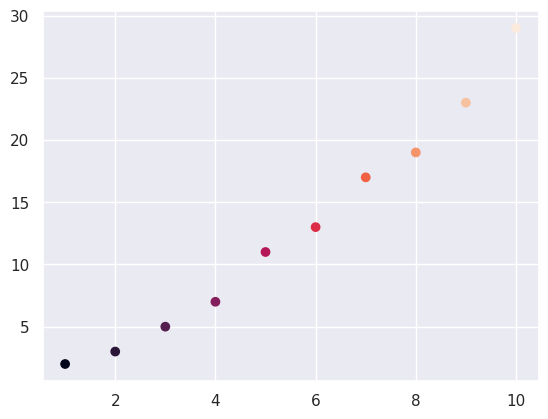

In [16]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# The 'c' argument should have the same number of elements as 'x' and 'y'
colors = [value for value in range(10)]  # Example: coloring based on the value

plt.scatter(x, y, c=colors)
plt.show()


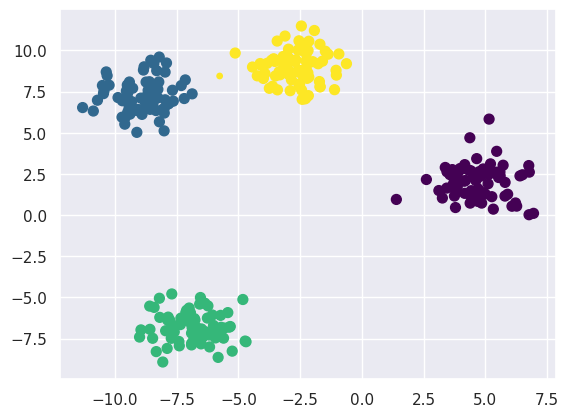

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Create synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Train Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)

# Calculate sizes for scatter plot
size = 50 * probs.max(1) ** 2

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
plt.show()


Internally, a Gaussian Mixture Model (GMM) operates in a manner akin to the k-means algorithm, employing an expectation-maximization strategy that can be described in the following steps:

**Initialization:** Select initial estimates for the positions and shapes of the clusters.

**Iterative Process:**

* E-step (Expectation): For each data point, calculate the probabilities indicating its likelihood of belonging to each cluster.
*M-step (Maximization): Update the parameters (location, scale, and shape) of each cluster using all the data points, weighted by the probabilities calculated in the E-step.
As a result, clusters in a GMM are represented by smooth Gaussian shapes rather than distinct boundaries, unlike the hard clustering in k-means.

Similar to the k-means approach, the GMM's expectation-maximization algorithm can occasionally fail to find the most optimal solution. Therefore, it's common practice to run the algorithm multiple times with different random initializations.

For practical applications, it's useful to have a function that visualizes the GMM clusters. This function can draw ellipses based on the parameters of the Gaussian models outputted by the GMM, providing a graphical representation of the location and shape of each cluster.

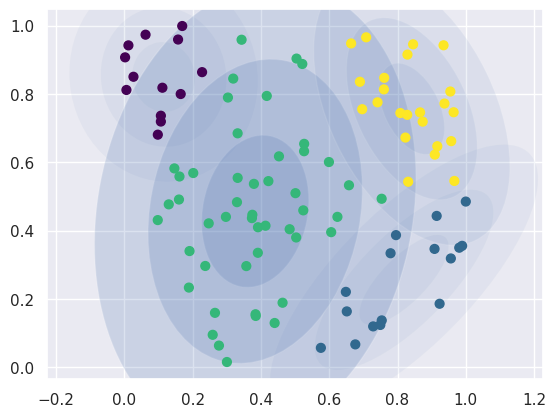

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# Example usage
# Replace with your actual data
X = np.random.rand(100, 2)  # Sample dataset

gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)
plt.show()


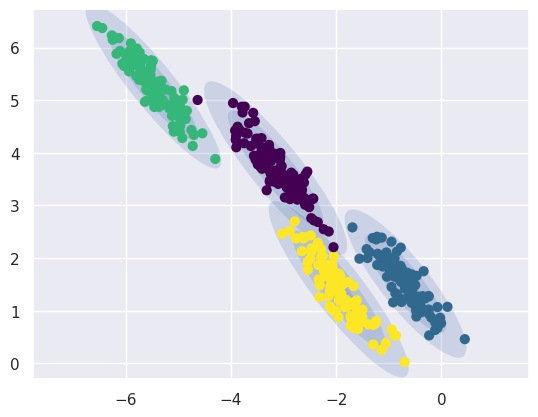

In [19]:
from sklearn.mixture import GaussianMixture

# Assuming X_stretched is your dataset. If not, define it accordingly
# X_stretched = ... (your dataset here)

# Create the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)

# Use the plot_gmm function to plot
plot_gmm(gmm, X_stretched)



# Choosing the covariance type

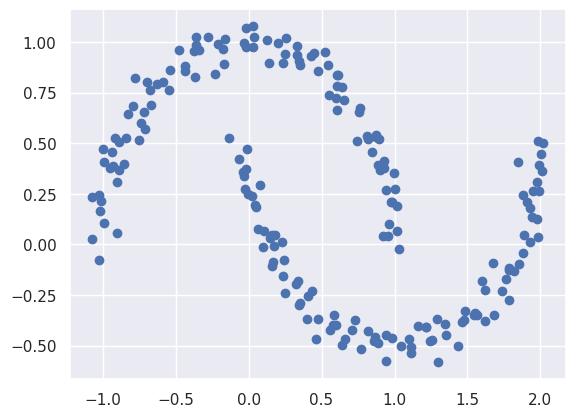

In [20]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

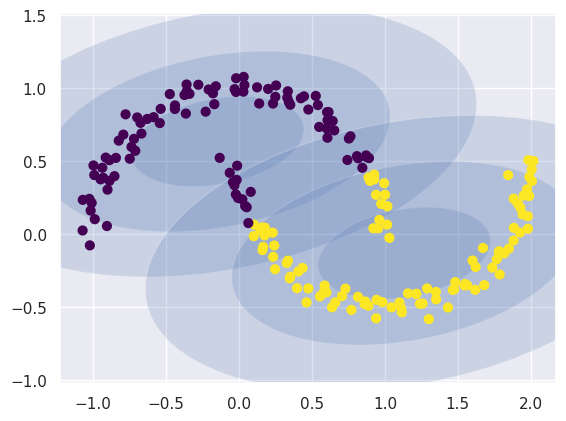

In [21]:
from sklearn.mixture import GaussianMixture

# Assuming Xmoon is your dataset. If not, you need to define it.
# Xmoon = ... (your dataset here)

# Create the Gaussian Mixture Model
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Use the plot_gmm function to plot
plot_gmm(gmm2, Xmoon)


**How many components?**

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset
A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting.
Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC)
Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these
Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

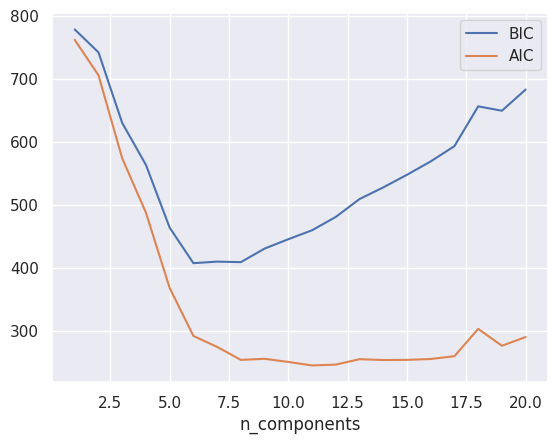

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Load or generate your dataset here
# For example, if you're loading from a CSV:
# Xmoon = pd.read_csv('path_to_your_dataset.csv').values
# Or, if you're generating data:
# Xmoon = some_data_generation_function()

# Ensure Xmoon is defined before this line
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()



The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use.
The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice.
As is typical with this sort of problem, the BIC recommends a simpler model.

**Notice the important point**:this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm.

**Akaike Information Criterion**

The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting a model.

The AIC statistic is defined for logistic regression as follows:

                        AIC= -2/N*LL+2*K/N  

Where

N is the number of examples in the training dataset,
LL is the log-likelihood of the model on the training dataset
k is the number of parameters in the model.
The score, as defined above, is minimized, e.g. the model with the lowest AIC is selected.

To use AIC for model selection, we simply choose the model giving smallest AIC over the set of models considered.

Compared to the BIC method (below), the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models.
We see that the penalty for AIC is less than for BIC. This causes AIC to pick more complex models.
**Bayesian Information Criterion**

The Bayesian Information Criterion, or BIC for short, is a method for scoring and selecting a model.

The BIC statistic is calculated for logistic regression as follows :

                            BIC= -2*LL+LOG(N)*K

Where

log() has the base-e called the natural logarithm
LL is the log-likelihood of the model
N is the number of examples in the training dataset
k is the number of parameters in the model.
The score as defined above is minimized, e.g. the model with the lowest BIC is selected

The quantity calculated is different from AIC, although can be shown to be proportional to the AIC.

Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.
Note that, compared to AIC, this penalizes model complexity more heavily.

Importantly, the derivation of BIC under the Bayesian probability framework means that if a selection of candidate models includes a true model for the dataset, then the probability that BIC will select the true model increases with the size of the training dataset. This cannot be said for the AIC score.

**NOTE : **A downside of BIC is that for smaller, less representative training datasets, it is more likely to choose models that are too simple.